<a href="https://colab.research.google.com/github/Sanstheskelato/mes-codes-IA/blob/main/mon_projet_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# train_set et test_set

(100, 2)
(100, 1)


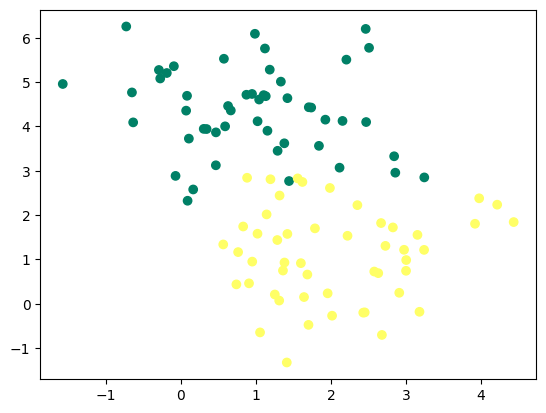

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print(X.shape)
print(y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")
plt.show()

# normalisé les données


In [ ]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_normalized = np.concatenate([((X - mean) / std), ((X - mean) / std)**2, ((X - mean) / std)**3, ((X - mean) / std)**4], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

X_normalized.shape

(100, 8)

# Foward Propagation

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# Back Propagation

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Entrainement du modèle

In [ ]:
history = model.fit(X_normalized, y, epochs=300, batch_size=40, validation_split=0.2)

Epoch 1/300
2/2 [==============================] - 1s 211ms/step - loss: 0.8625 - accuracy: 0.4750 - val_loss: 0.7067 - val_accuracy: 0.4500
Epoch 2/300
2/2 [==============================] - 0s 31ms/step - loss: 0.7547 - accuracy: 0.6250 - val_loss: 0.6697 - val_accuracy: 0.5500
Epoch 3/300
2/2 [==============================] - 0s 31ms/step - loss: 0.6841 - accuracy: 0.7875 - val_loss: 0.6441 - val_accuracy: 0.8000
Epoch 4/300
2/2 [==============================] - 0s 31ms/step - loss: 0.6340 - accuracy: 0.8625 - val_loss: 0.6247 - val_accuracy: 0.8500
Epoch 5/300
2/2 [==============================] - 0s 54ms/step - loss: 0.6009 - accuracy: 0.8750 - val_loss: 0.6049 - val_accuracy: 0.8500
Epoch 6/300
2/2 [==============================] - 0s 31ms/step - loss: 0.5752 - accuracy: 0.9000 - val_loss: 0.5860 - val_accuracy: 0.9000
Epoch 7/300
2/2 [==============================] - 0s 50ms/step - loss: 0.5532 - accuracy: 0.9125 - val_loss: 0.5618 - val_accuracy: 0.9000
Epoch 8/300
2/2 [==

In [ ]:
loss, accuracy = model.evaluate(X_normalized, y)
print("Loss:", loss)
print("Accuracy:", accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 1.0000
Loss: 0.018293999135494232
Accuracy: 1.0


In [ ]:
xx, yy = np.meshgrid(np.linspace(X_normalized[:, 0].min(), X_normalized[:, 0].max(), 100),
                     np.linspace(X_normalized[:, 1].min(), X_normalized[:, 1].max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_normalized =  np.concatenate([grid, grid**2, grid**3, grid**4], axis=1)
probs = model.predict(grid_normalized).reshape(xx.shape)

313/313 [==============================] - 1s 2ms/step


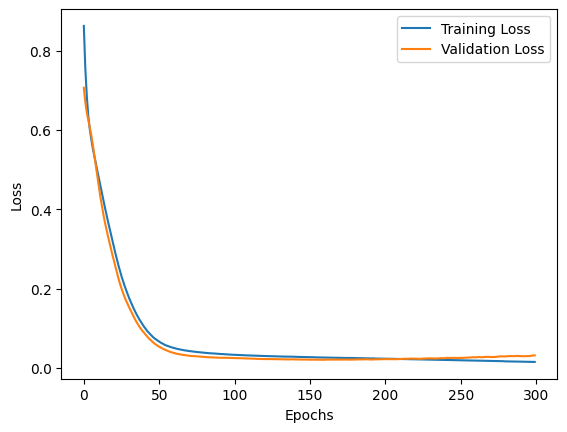

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fontière de décision

1.0


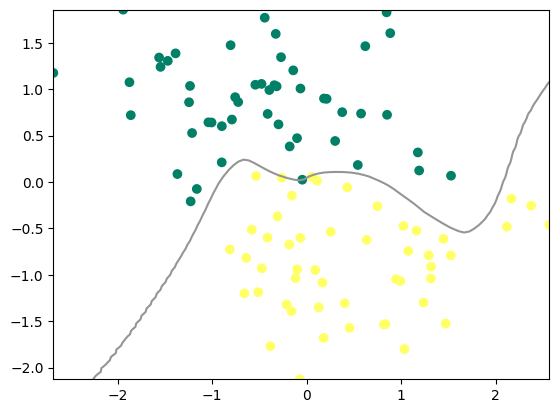

In [ ]:
plt.scatter(X_normalized[:,0], X_normalized[:,1], c=y, cmap="summer")
plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=1)
plt.plot()
print(accuracy)